In [2]:
# tratamento de dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# modelos de regressao
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# hyperparams
from sklearn.model_selection import GridSearchCV


# metricas
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

# graficos
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns



In [3]:
# recebendo os dados
dados = pd.read_csv("dataset_velocidade.csv", sep=",")

##Analisando os dados

In [4]:
dados.head()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
0,NaN,-0.029431,-0.019621,9.781015,-0.122070,-0.006327,-0.112208,32.166023,0.010822,paved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved


In [5]:
# Temos uma coluna categorica -> dados["road"]
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124684 entries, 0 to 124683
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   no_speed_bump     123437 non-null  float64
 1   acc_x_dashboard   123437 non-null  float64
 2   acc_y_dashboard   123437 non-null  float64
 3   acc_z_dashboard   123437 non-null  float64
 4   gyro_x_dashboard  123437 non-null  float64
 5   gyro_y_dashboard  123437 non-null  float64
 6   gyro_z_dashboard  123437 non-null  float64
 7   temp_dashboard    123437 non-null  float64
 8   speed             123437 non-null  float64
 9   road              124684 non-null  object 
dtypes: float64(9), object(1)
memory usage: 9.5+ MB


In [7]:
dados.describe()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
count,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000
mean,0.983903,0.617630,-0.240425,9.828602,0.018676,-0.074961,-0.197090,32.829623,9.238824
std,0.125850,1.434470,1.963395,1.704215,3.476104,5.409665,3.578210,0.417881,6.298133
min,0.000000,-8.710806,-13.290681,-3.705523,-35.766602,-69.159159,-23.091944,0.000000,0.005860
25%,1.000000,-0.091680,-1.164049,9.084302,-1.220703,-1.959452,-1.516017,32.501483,4.586517
50%,1.000000,0.521235,-0.206369,9.824110,0.000000,-0.052103,-0.081690,32.789020,6.692151
75%,1.000000,1.326884,0.590901,10.595043,1.266479,1.824728,1.261083,33.172402,15.029036
max,1.000000,13.957495,18.276868,24.024120,44.708252,62.432638,22.165624,33.843322,21.592090


In [8]:
dados.shape

(124684, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b81533b10>,
      dtype=object)

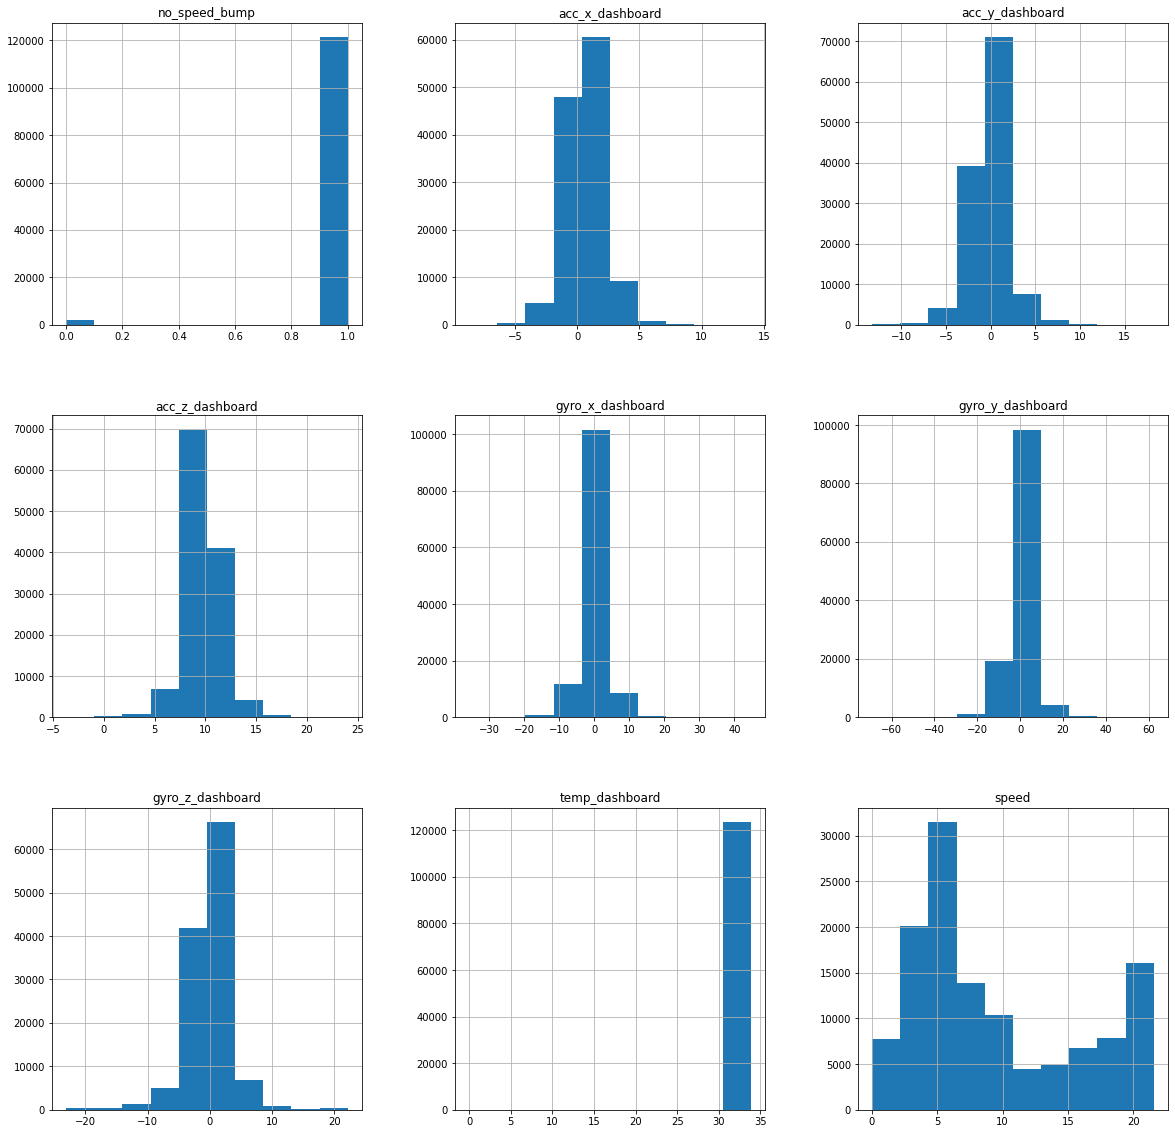

In [9]:
dados.hist(figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


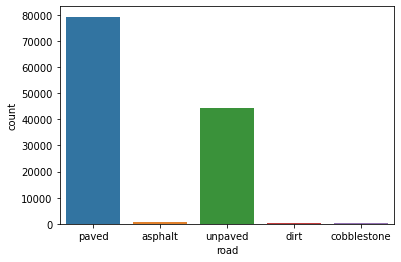

In [10]:
sns.countplot(dados["road"])

In [11]:
dados["road"].value_counts()

paved          79263
unpaved        44177
asphalt          594
dirt             451
cobblestone      199
Name: road, dtype: int64

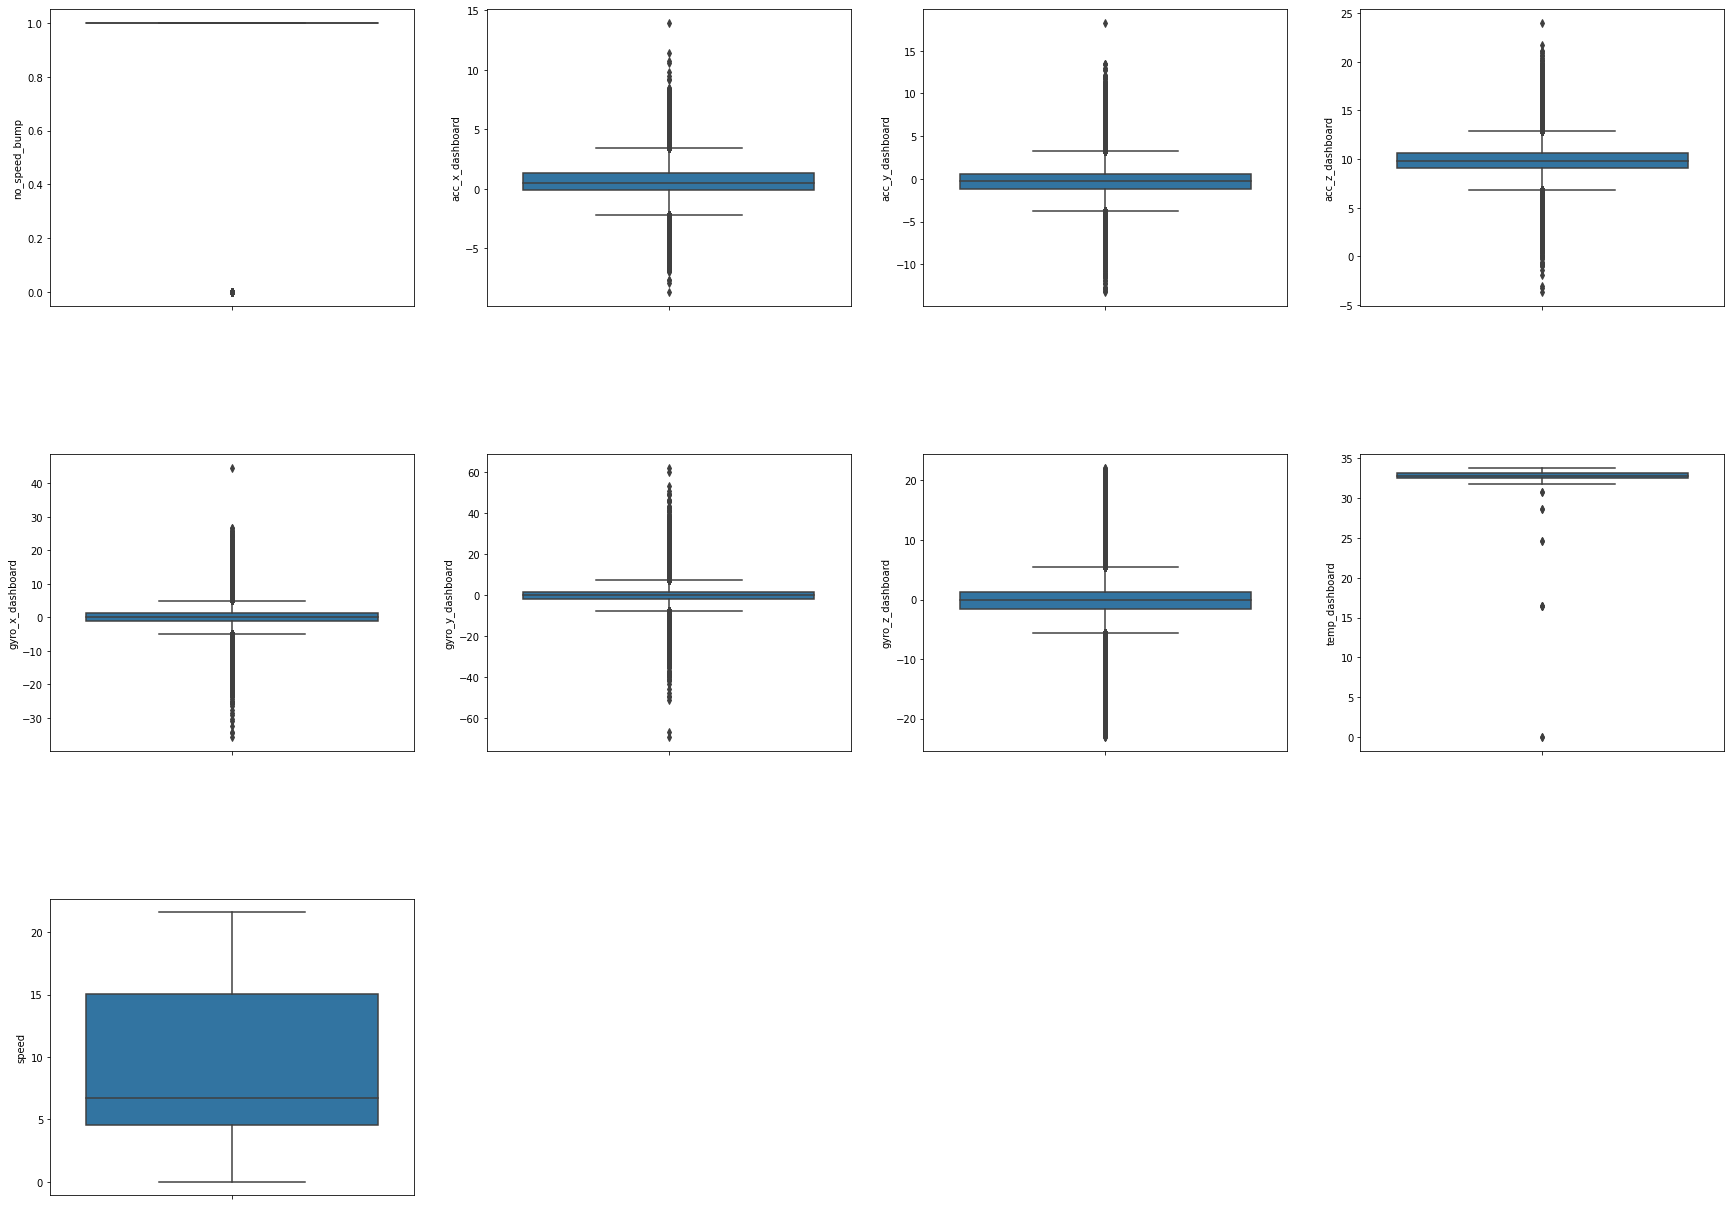

In [17]:
# Verificando os outliers

plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace = 0.5)

i = 1
for col in dados.columns.drop("road"):
  plt.subplot(4, 4, i)
  sns.boxplot(data=dados, y=col)
  i += 1

##Tratando os dados

In [20]:
dados_bkp = dados

In [21]:
# primeiro vou tratar a coluna categória
dados_1 = pd.get_dummies(dados["road"], prefix = "road")
dados = pd.concat([dados, dados_1], axis=1)
dados = dados.drop(columns="road")

In [25]:
dados.isnull().sum()

no_speed_bump       1247
acc_x_dashboard     1247
acc_y_dashboard     1247
acc_z_dashboard     1247
gyro_x_dashboard    1247
gyro_y_dashboard    1247
gyro_z_dashboard    1247
temp_dashboard      1247
speed               1247
road_asphalt           0
road_cobblestone       0
road_dirt              0
road_paved             0
road_unpaved           0
dtype: int64

In [30]:
coluna = "speed"
dados[coluna].median()

6.6921515

In [32]:
# tratando os valores nulos

for col in dados:
  mediana = dados[col].median()
  dados.fillna(mediana, inplace = True)

In [48]:
# tratando os outiliers
colunas = ["acc_x_dashboard", "acc_y_dashboard", "acc_z_dashboard", "gyro_x_dashboard", "gyro_y_dashboard", "gyro_z_dashboard", "temp_dashboard"]

for col in colunas:
  mediana = dados[col].median()
  media = dados[col].mean()
  desvio_padrao = dados[col].std()

  dados[col][(dados[col] < media - 3 * desvio_padrao) | (dados[col] > media + 3 * desvio_padrao)] = mediana
  dados[col][(dados[col] < media - 3 * desvio_padrao) | (dados[col] > media + 3 * desvio_padrao)].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dis

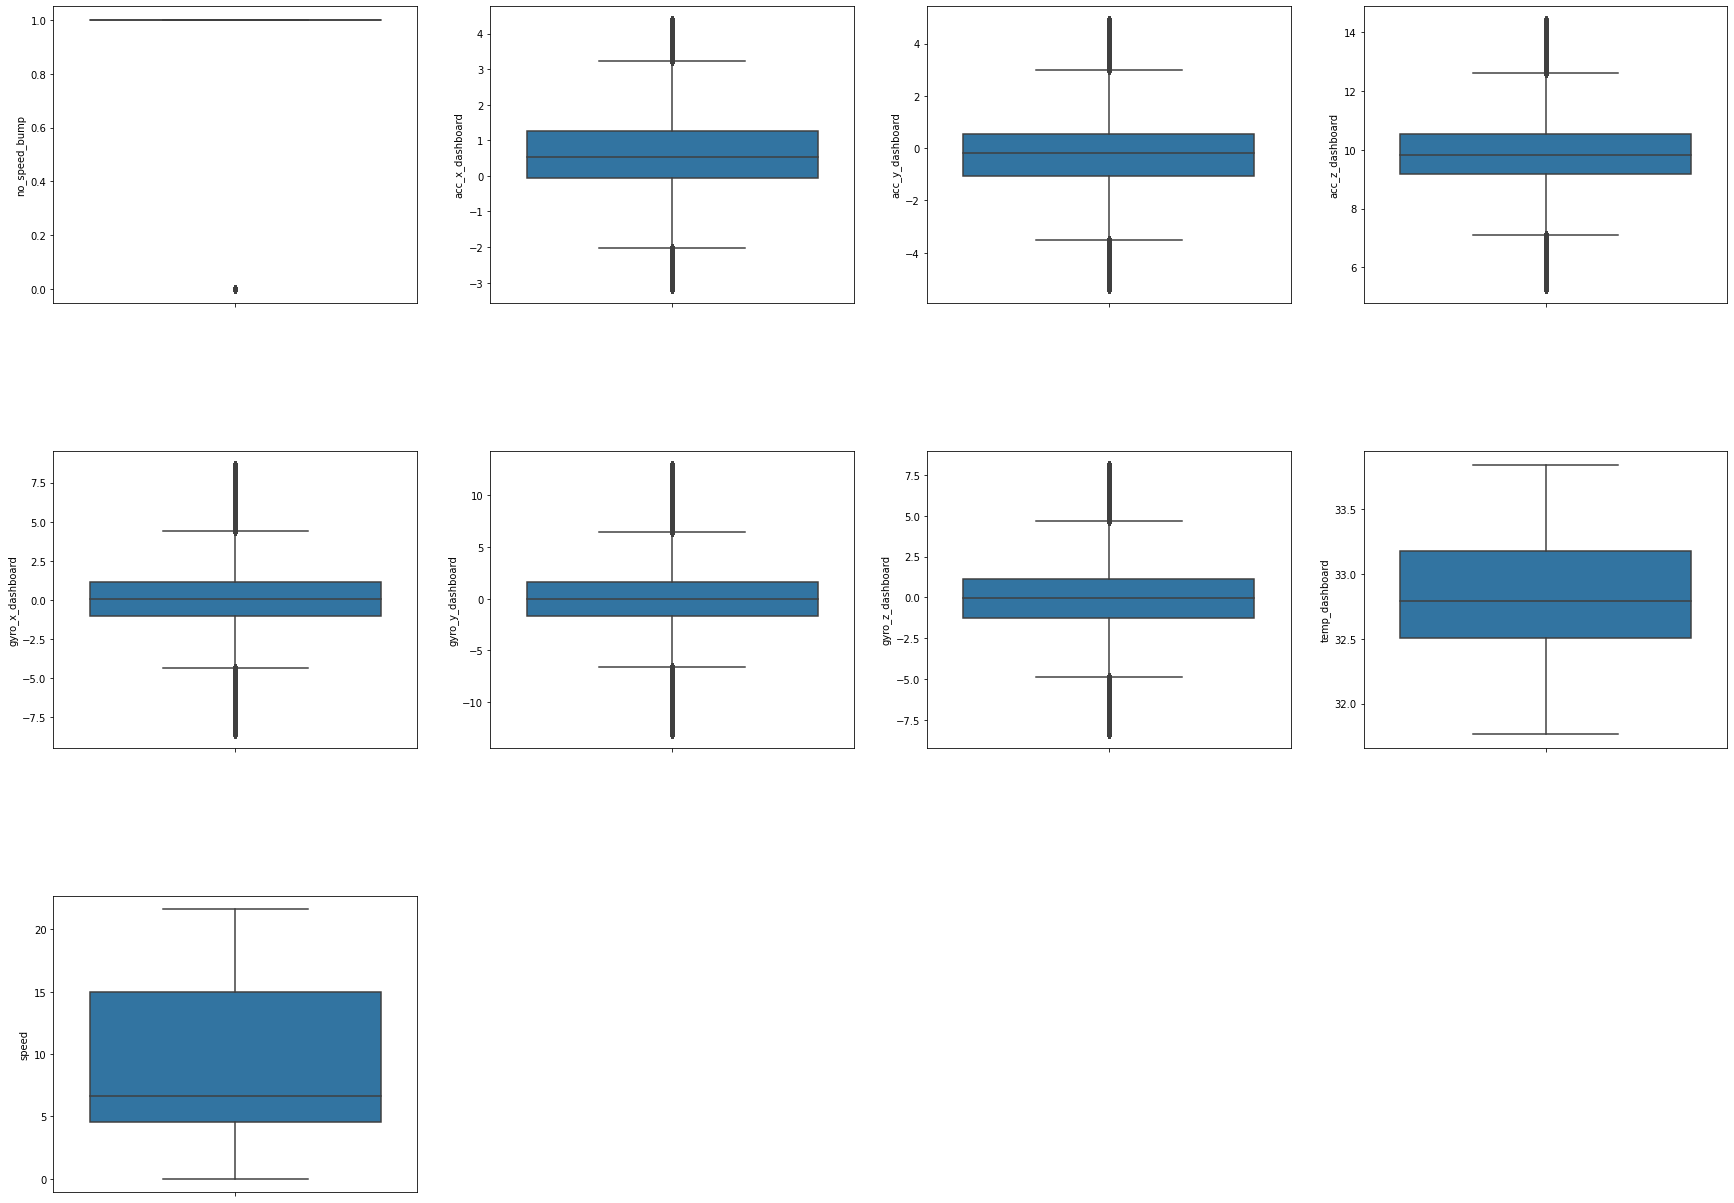

In [56]:
categoricas = ["road_paved", "road_unpaved", "road_asphalt", "road_dirt", "road_cobblestone"]

plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace = 0.5)

i = 1
for col in dados.columns.drop(categoricas):
  plt.subplot(4, 4, i)
  sns.boxplot(data=dados, y=col)
  i += 1

##Treinando os modelos

####Regressao LInear

In [52]:
# Dividinco o conjunto de treinamento

X = dados.drop(columns=['speed']).values
y = dados.speed.values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42
                                                    )

In [53]:
# treinando o modelo 
model_RL = LinearRegression().fit(X_train, y_train)
y_pred_RL = model_RL.predict(X_test)

Desempenho

In [54]:
print(f'r2 score: {r2_score(y_test,y_pred_RL)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_RL)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_RL)}')

r2 score: 0.34798023065416794
MSE: 25.966162006025076
MAE: 3.8825017331991365


####Random Forest

In [39]:
# Treinando o modelo
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_RFR = forest_reg.predict(X_test)

Desempenho

In [40]:
print(f'r2 score: {r2_score(y_test,y_pred_RFR)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_RFR)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_RFR)}')

r2 score: 0.8055320885905397
MSE: 7.744527896290017
MAE: 1.7536073773108665
